In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d zlatan599/garbage-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/zlatan599/garbage-dataset-classification
License(s): MIT
  0% 0.00/121M [00:00<?, ?B/s]
100% 121M/121M [00:00<00:00, 1.38GB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/garbage-dataset-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os
os.listdir('/content/Garbage_Dataset_Classification/images')


['plastic', 'trash', 'cardboard', 'metal', 'paper', 'glass']

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [6]:
image_size = (150, 150)
batch_size = 32

In [7]:
image_data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    )

train_data = image_data_generator.flow_from_directory(
    directory='/content/Garbage_Dataset_Classification/images',
    target_size=image_size,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
    shuffle=True,
    seed=42
    )

val_data = image_data_generator.flow_from_directory(
    directory='/content/Garbage_Dataset_Classification/images',
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=True,
    seed=42
    )


Found 11123 images belonging to 6 classes.
Found 2778 images belonging to 6 classes.


In [8]:
num_classes = train_data.num_classes
num_classes

6

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 344,198 (1.31 MB)

 Trainable params: 344,198 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
epochs = 20

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)

Epoch 1/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 80s 229ms/step - accuracy: 0.2306 - loss: 1.7367 - val_accuracy: 0.3744 - val_loss: 1.6314
Epoch 2/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 75s 216ms/step - accuracy: 0.3527 - loss: 1.5998 - val_accuracy: 0.4060 - val_loss: 1.5146
Epoch 3/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 76s 220ms/step - accuracy: 0.4371 - loss: 1.4553 - val_accuracy: 0.4114 - val_loss: 1.5360
Epoch 4/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 75s 214ms/step - accuracy: 0.4812 - loss: 1.3600 - val_accuracy: 0.5040 - val_loss: 1.3405
Epoch 5/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 74s 214ms/step - accuracy: 0.4993 - loss: 1.3050 - val_accuracy: 0.5572 - val_loss: 1.2188
Epoch 6/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 74s 214ms/step - accuracy: 0.5386 - loss: 1.2340 - val_accuracy: 0.5558 - val_loss: 1.2069
Epoch 7/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 75s 216ms/step - accuracy: 0.5616 - loss: 1.1978 - val_accuracy: 0.5612 - val_loss: 1.1929
Epoch 8/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 75s 216ms/step - accuracy: 0.5839 - loss: 1

In [15]:
model.save("garbage_classifier_cnn.h5")


In [19]:
class_labels = list(train_data.class_indices.keys())
class_labels

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

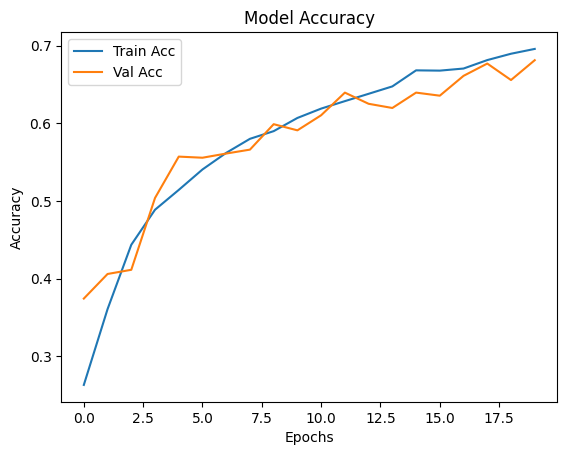

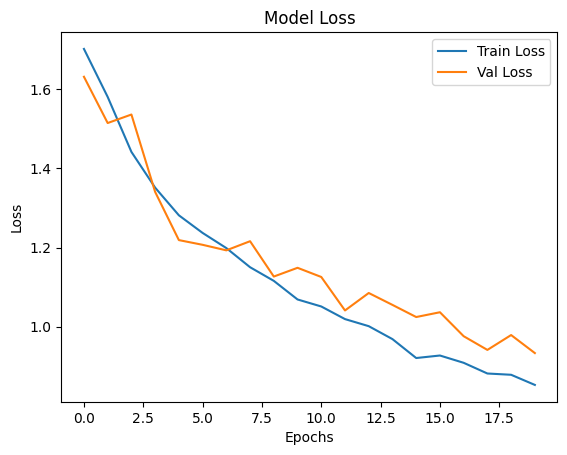

In [18]:


# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_garbage_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 150, 150, 3)
    img_array /= 255.0  # Normalize

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")
